# CSI4106 Assignment 2
### Name: Angus Leung
### Student ID: 300110509
### Date: Oct 13 2023

In [1]:
# Packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import time

In [2]:
# Import dataset for training
source_url = "https://raw.githubusercontent.com/angusleung100/CSI4106-A2/main/train.csv"
dataset = pd.read_csv(source_url)

columns = dataset.columns

In [3]:
# Check first few rows for integrity
dataset = pd.DataFrame(data=dataset)

# Select n rows
n = 25000 # 25000 rows won't crash
dataset = dataset.iloc[:n]

dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,43125,41487,4,Neil Maidmentv,35.0,42355864.0,Journalist,21687.46,2003.288333,1.0,...,Good,1370.17,25.973429,257.0,No,56.529937,53.817752,High_spent_Small_value_payments,305.011604,Good
24996,43126,41487,5,Neil Maidmentv,35.0,42355864.0,Journalist,21687.46,2003.288333,1.0,...,Good,1370.17,22.238148,258.0,NM,56.529937,53.817752,High_spent_Small_value_payments,301.187152,Standard
24997,43127,41487,6,Neil Maidmentv,35.0,42355864.0,Journalist,21687.46,2003.288333,1.0,...,Good,1370.17,28.530905,259.0,NM,56.529937,53.817752,Low_spent_Small_value_payments,283.850710,Good
24998,43128,41487,7,Neil Maidmentv,35.0,42355864.0,Journalist,21687.46,2003.288333,1.0,...,Good,1370.17,35.674676,260.0,No,56.529937,53.817752,Low_spent_Small_value_payments,199.105461,Standard


# Goal of the Task
The goal is to use Naives Bayes and Logistic Regression for Machine Learning to do an empirical study on the current dataset.

# Ideas for applications
- Risk and leverage evaluation
- Trends in credit utilization throughout the year
- How likely someone will recover from financial ruin

# Characterizing Dataset

This dataset is calculating someone's credit health.

This Kaggle dataset offers 100k lines of training data with 3 classes for credit score: Good, Standard, Poor.

28 columns are included in the dataset, however, we will only care about the columns that contribute to the dataset, rather than personal information, as we are not determining based on a certain group of people, just the general population.

We will be removing the names, ssn, customer id, and line id from the dataset and will use the rest.

In terms of missing data, I believe there is adequate amounts of features to determine risk

Since the dataset has been cleaned already, we do not need to worry about empty and bad rows.

# Testing

For testing, it also offers 50k lines of test data as well to be used.

# Feature Engineering
## Useful Features
- Month, Age, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score


## Anything Missing or not useful
This will be enough for our learning. As stated before, we are removing ID, Name, SSN, Customer ID from the set.

## Domain Expertise
I am not a financial planner or risk management analyst, however, I do get my credit score pulled a lot and apply for a lot of credit cards and bank accounts, so I have to submit this info usually




In [4]:
# Remove Not Useful Features
dataset = dataset.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1)  # We want general results, not specific to a customer

dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,35.0,Journalist,21687.46,2003.288333,1.0,1.0,12.0,4.0,"credit-builder loan,credit-builder loan,studen...",...,Good,1370.17,25.973429,257.0,No,56.529937,53.817752,High_spent_Small_value_payments,305.011604,Good
24996,5,35.0,Journalist,21687.46,2003.288333,1.0,1.0,12.0,4.0,"credit-builder loan,credit-builder loan,studen...",...,Good,1370.17,22.238148,258.0,NM,56.529937,53.817752,High_spent_Small_value_payments,301.187152,Standard
24997,6,35.0,Journalist,21687.46,2003.288333,1.0,1.0,12.0,4.0,"credit-builder loan,credit-builder loan,studen...",...,Good,1370.17,28.530905,259.0,NM,56.529937,53.817752,Low_spent_Small_value_payments,283.850710,Good
24998,7,35.0,Journalist,21687.46,2003.288333,1.0,1.0,12.0,4.0,"credit-builder loan,credit-builder loan,studen...",...,Good,1370.17,35.674676,260.0,No,56.529937,53.817752,Low_spent_Small_value_payments,199.105461,Standard


## Ranges Of Each Feature And Class

In [5]:
# Find Ranges For Columns
for column in list(dataset.columns):  # Column select

  range = pd.Series(dataset[column]).describe() # Get range of data

  if 'min' in range:  # Format for Numbers with min and Max
    print("- "+column+": "+str(range['min'])+" - "+str(range['max']))
  else: # Format for strings and text
    range = dataset[column].unique()

    print("- "+column+": "+str(list(range)))



- Month: 1.0 - 8.0
- Age: 14.0 - 56.0
- Occupation: ['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']
- Annual_Income: 7006.52 - 179987.28
- Monthly_Inhand_Salary: 333.5966666666667 - 14866.446666666665
- Num_Bank_Accounts: 0.0 - 10.0
- Num_Credit_Card: 0.0 - 11.0
- Interest_Rate: 1.0 - 34.0
- Num_of_Loan: 0.0 - 9.0
- Type_of_Loan: ['auto loan,credit-builder loan,personal loan,home equity loan', 'credit-builder loan', 'auto loan,auto loan,not specified', 'not specified', 'No Data', 'credit-builder loan,mortgage loan', 'not specified,auto loan,student loan', 'personal loan,debt consolidation loan,auto loan', 'not specified,payday loan', 'credit-builder loan,personal loan,auto loan', 'payday loan,payday loan', 'not specified,student loan,personal loan', 'personal loan,payday loan,student loan,auto loan,home equity loan,student loan,payday loan', 'not 

In [6]:
# Tables of data frequency for each column used
for column in list(dataset.columns):
  #range = pd.Series(dataset[column]).describe()

  #print(range)
  rangeCount = dataset[column].value_counts() # Count occurrences

  print(column)
  print(len(column)*"-")
  print(rangeCount)


Month
-----
1    3125
2    3125
3    3125
4    3125
5    3125
6    3125
7    3125
8    3125
Name: Month, dtype: int64
Age
---
36.0    873
26.0    808
42.0    787
30.0    783
31.0    768
28.0    767
25.0    764
34.0    758
45.0    754
43.0    746
33.0    740
21.0    734
41.0    726
29.0    723
38.0    715
20.0    706
32.0    702
35.0    700
24.0    695
19.0    694
37.0    681
27.0    674
22.0    666
39.0    662
40.0    632
23.0    625
44.0    569
18.0    555
15.0    403
16.0    399
54.0    382
46.0    365
47.0    364
49.0    361
17.0    355
55.0    342
50.0    339
48.0    332
51.0    321
53.0    318
52.0    311
14.0    310
56.0     91
Name: Age, dtype: int64
Occupation
----------
Mechanic         1832
Media_Manager    1744
Teacher          1728
Journalist       1720
Lawyer           1696
Doctor           1696
Entrepreneur     1688
Developer        1688
Writer           1664
Architect        1640
Scientist        1608
Engineer         1600
Manager          1600
Musician         1560
Acco

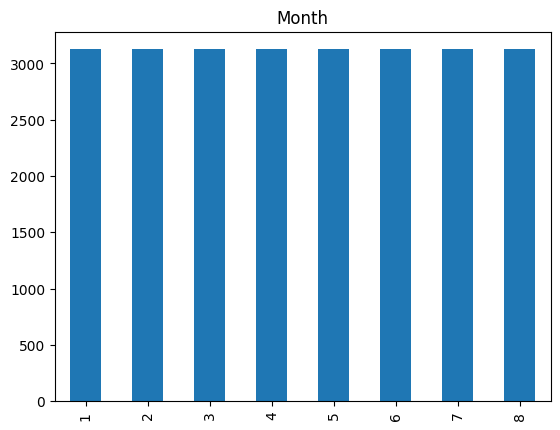

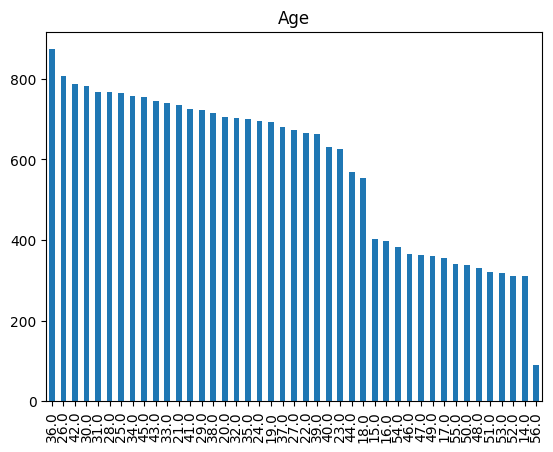

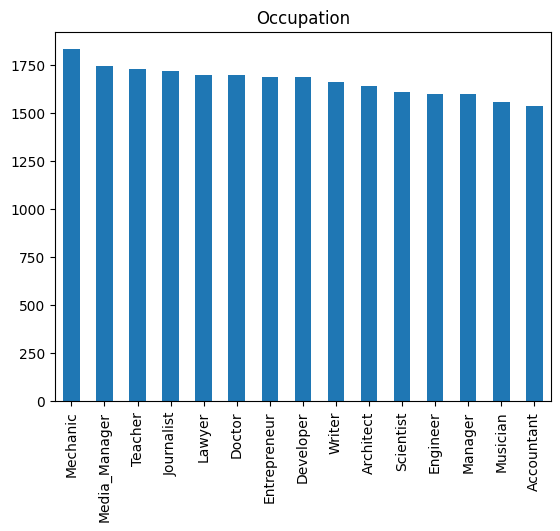

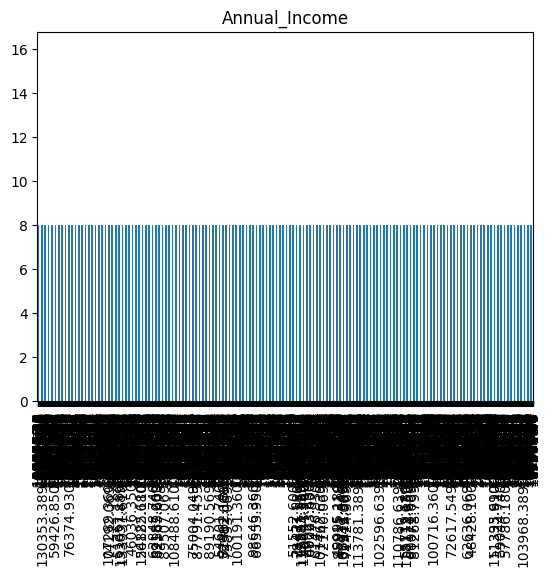

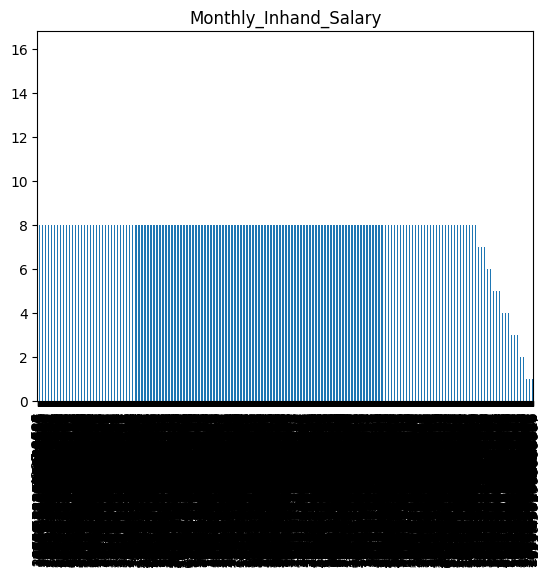

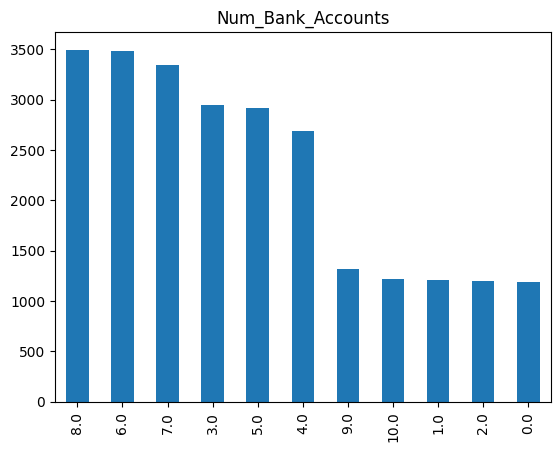

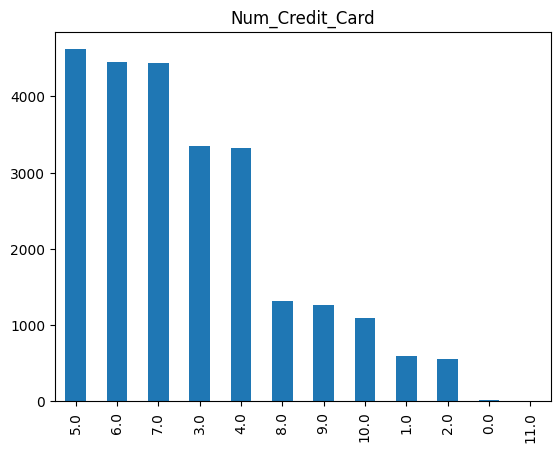

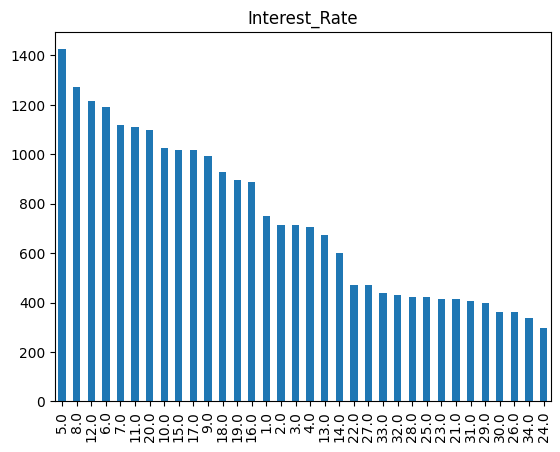

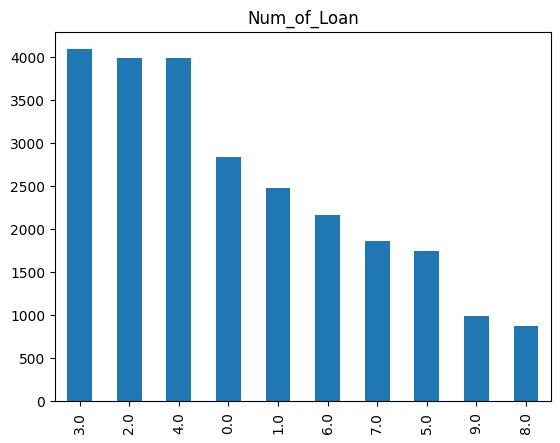

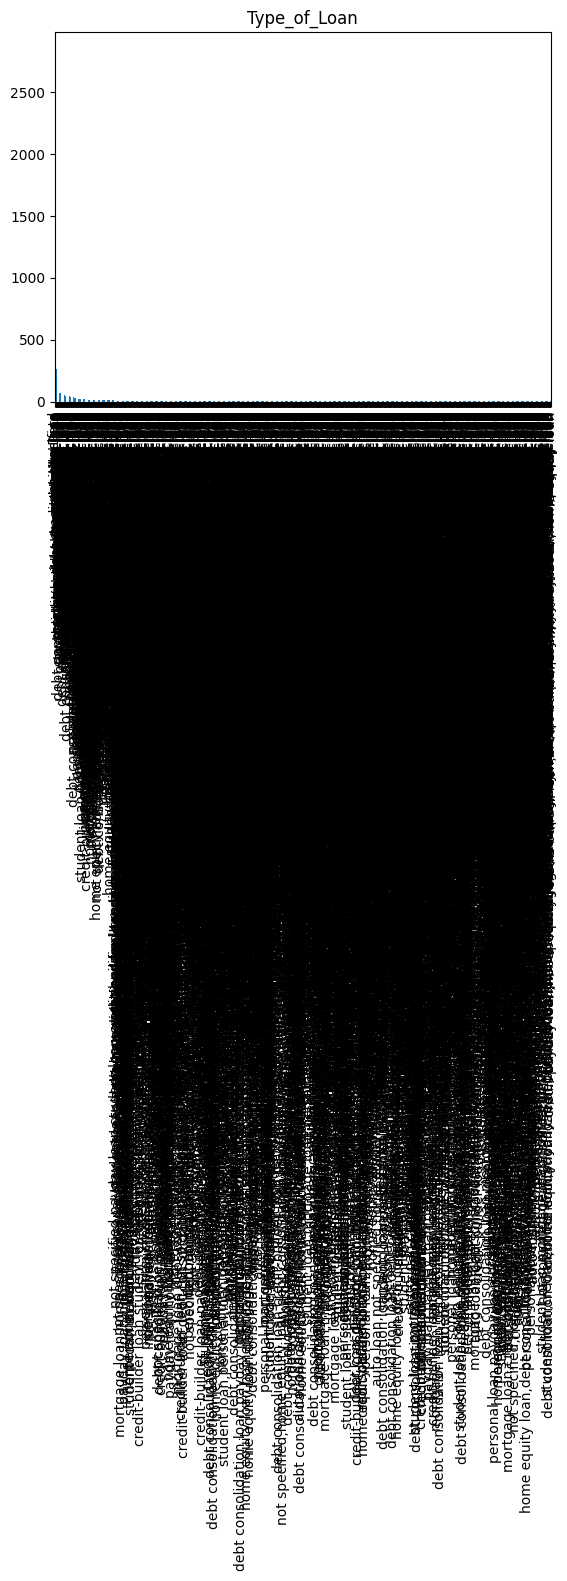

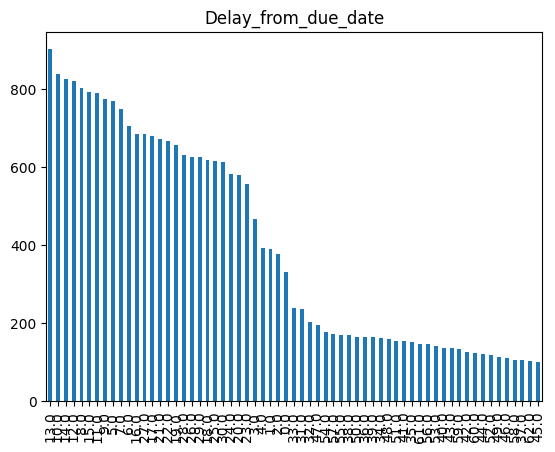

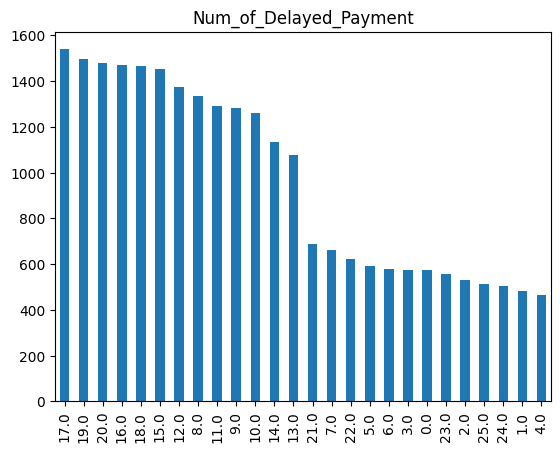

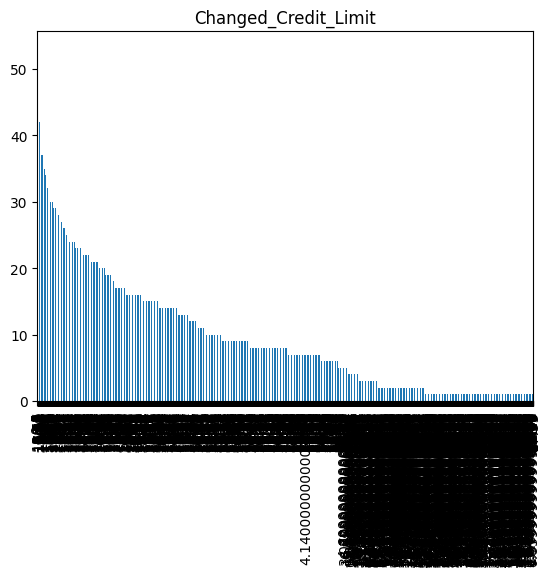

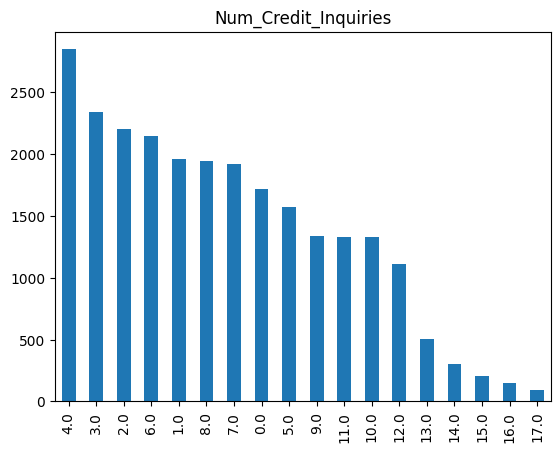

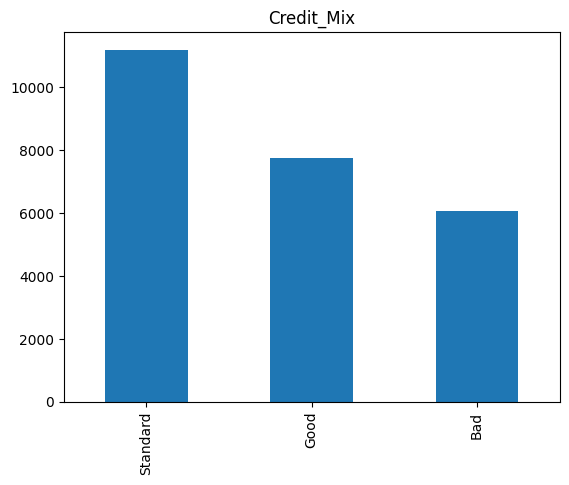

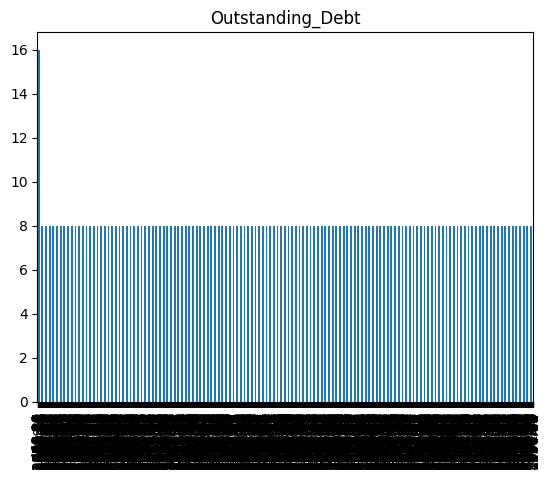

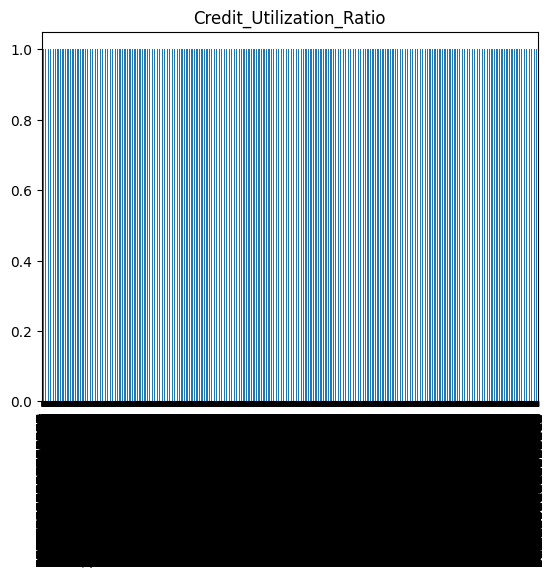

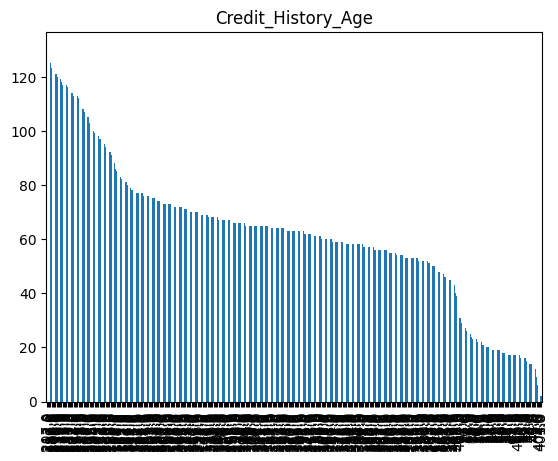

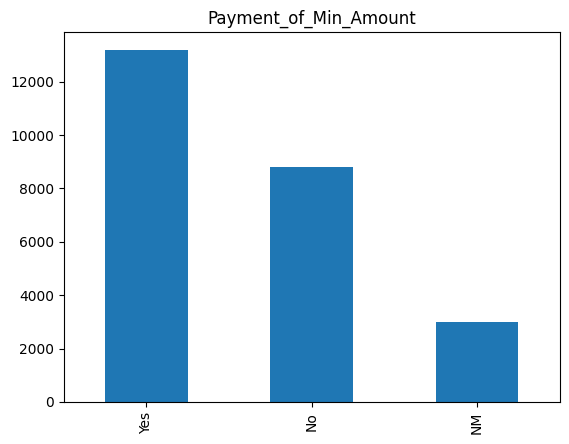

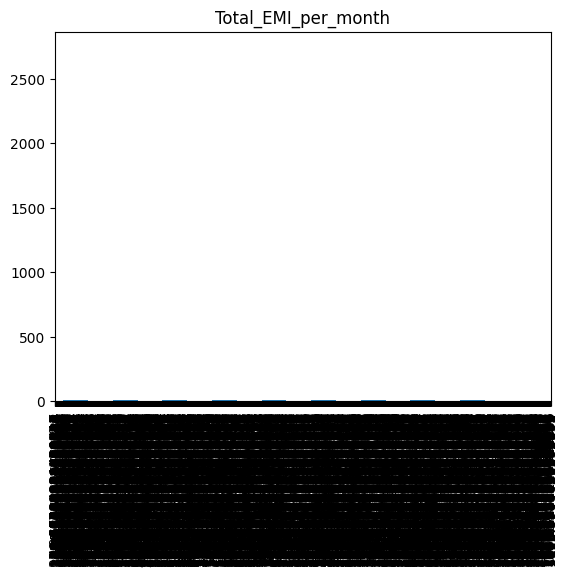

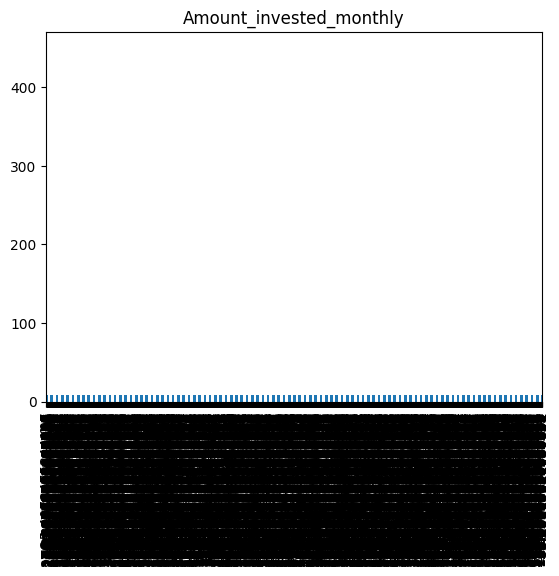

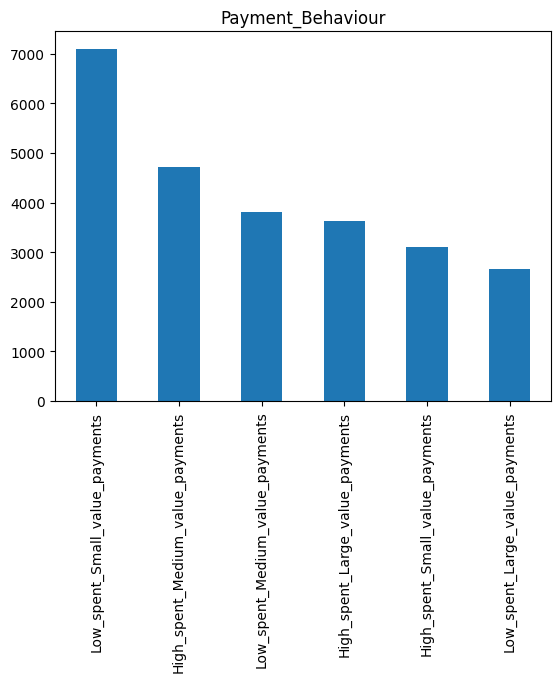

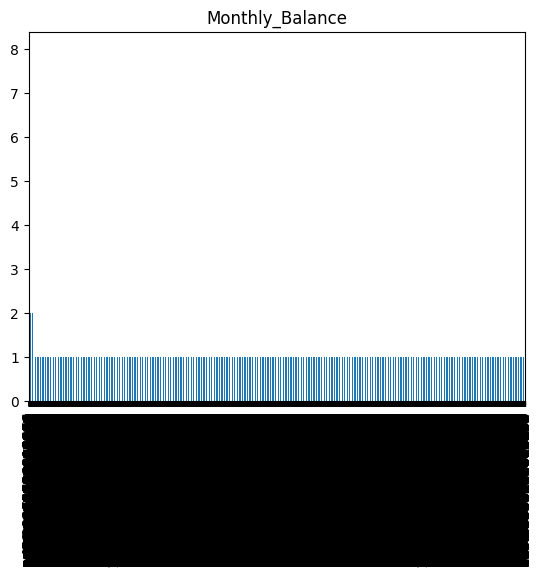

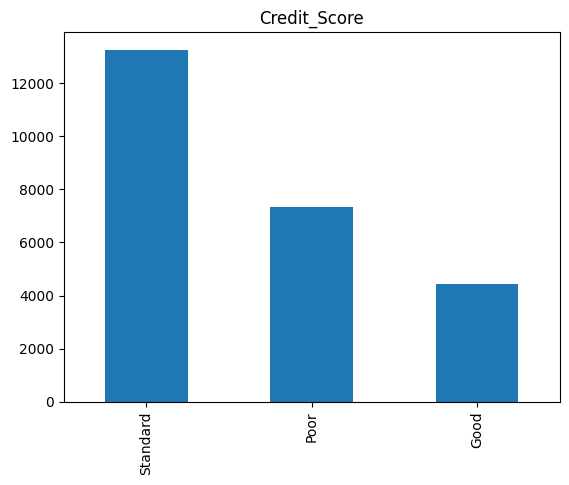

In [7]:
# Visualize Ranges

for column in list(dataset.columns):


  range = dataset[column].value_counts()

  range.plot(kind='bar', title=column)


  plt.show()




# Visualization discussion
Based on visualization of the data and the Kaggle Data Card information, as the run time for this visualization with matplotlib runs over 53 minutes, it seems the data is well spread out.

Based on the Kaggle Data Card, the Annual Incomes are skewed more towards the lower end of 7.01k and Monthly Inhand Salary is also heavily weighted on the lower end of the chart.

Month and Age are well distributed, while Number of Bank Accounts, Credit Cards, and Credit Utilization are middle heavy.

Various other categories such as Amount invested, EMI, and Outstanding Debt, everyone is able to not grow their debt, but is unable to invest further and need to pay it down.

In terms of visualizaton, it does help improve the overall view of the study to see if there are any biases. It also allows us to see any patterns, such as I noticed we can chart as well the months to compare how well people do depending on the Quarter, and so on.

Allowing normalization can help us segregate the financially illiterate and the financially literate later on, as well as who is poor and who is rich.

# Encode The Features
---

## Logistic Regression
---


In [8]:
from sklearn.compose import make_column_selector as selector
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

# Sort attributes into discrete and continuous attributes

# Discrete
categorical_columns_selector = selector(dtype_include=object) # Select discrete columns
discreteAttributes = categorical_columns_selector(dataset)
discreteAttributes.pop()  # Get rid of Credit Score column

print(discreteAttributes)

# One Hot Encode

logisticRegressionData = pd.get_dummies(dataset[discreteAttributes]) # get_dummies() does one hot encoding but leaves continuous attributes
print(logisticRegressionData)

['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
       Occupation_Accountant  Occupation_Architect  Occupation_Developer  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
24995                      0                     0                     0   
24996                      0                     0                     0   
24997                      0                     0                     0   
24998                      0                     0                     0   
24999                      0                     0                     0 

In [9]:
# Train
# Run time 25k samples: ~1.5min
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Data
X = logisticRegressionData
Y = dataset['Credit_Score']

crossValidation = KFold(n_splits=4) # 4 Fold

# Apply model to data
logisticRegression = LogisticRegression() # Tol: 1e-4 | C: 1.0

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_micro': make_scorer(precision_score, average='micro'),
           'precision_macro': make_scorer(precision_score, average='macro'),
           'recall_micro': make_scorer(recall_score, average='micro'),
           'recall_macro': make_scorer(recall_score, average='macro')}


scores = cross_validate(logisticRegression, X.values, Y.values, scoring=scoring, cv=crossValidation, n_jobs=-1, error_score="raise")


In [10]:
#print(scores)

print("Accuracy: "+str(mean(scores['test_accuracy']))+" | SD: "+str(std(scores['test_accuracy'])))
print("Precision (Micro): "+str(mean(scores['test_precision_micro']))+" | SD: "+str(std(scores['test_precision_micro'])))
print("Precision (Macro): "+str(mean(scores['test_precision_macro']))+" | SD: "+str(std(scores['test_precision_macro'])))
print("Recall (Micro): "+str(mean(scores['test_recall_micro']))+" | SD: "+str(std(scores['test_recall_micro'])))
print("Recall (Macro): "+str(mean(scores['test_recall_macro']))+" | SD: "+str(std(scores['test_recall_macro'])))

Accuracy: 0.60448 | SD: 0.005296942514318987
Precision (Micro): 0.60448 | SD: 0.005296942514318987
Precision (Macro): 0.5741094094530874 | SD: 0.005780647930690093
Recall (Micro): 0.60448 | SD: 0.005296942514318987
Recall (Macro): 0.5901652587266225 | SD: 0.01041376302169764


## Modified Settings Testing - Logistic Regression
---

In [11]:
# Parameters:
# Tol(erance for stopping criteria): 2e-4
# C (Inverse Regularization Strength): 2.0
#

logisticRegression = LogisticRegression(tol=2e-4, C=2)

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_micro': make_scorer(precision_score, average='micro'),
           'precision_macro': make_scorer(precision_score, average='macro'),
           'recall_micro': make_scorer(recall_score, average='micro'),
           'recall_macro': make_scorer(recall_score, average='macro')}


scores = cross_validate(logisticRegression, X.values, Y.values, scoring=scoring, cv=crossValidation, n_jobs=-1, error_score="raise")

print("Accuracy: "+str(mean(scores['test_accuracy']))+" | SD: "+str(std(scores['test_accuracy'])))
print("Precision (Micro): "+str(mean(scores['test_precision_micro']))+" | SD: "+str(std(scores['test_precision_micro'])))
print("Precision (Macro): "+str(mean(scores['test_precision_macro']))+" | SD: "+str(std(scores['test_precision_macro'])))
print("Recall (Micro): "+str(mean(scores['test_recall_micro']))+" | SD: "+str(std(scores['test_recall_micro'])))
print("Recall (Macro): "+str(mean(scores['test_recall_macro']))+" | SD: "+str(std(scores['test_recall_macro'])))

Accuracy: 0.6036 | SD: 0.005589132311906738
Precision (Micro): 0.6036 | SD: 0.005589132311906738
Precision (Macro): 0.5727427863456135 | SD: 0.006225304106309484
Recall (Micro): 0.6036 | SD: 0.005589132311906738
Recall (Macro): 0.5855994894459391 | SD: 0.010652268553192873


In [12]:
# Parameters:
# Tol(erance for stopping criteria): 5e-5
# C (Inverse Regularization Strength): 0.5

logisticRegression = LogisticRegression(C=0.5, tol=5e-5)

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_micro': make_scorer(precision_score, average='micro'),
           'precision_macro': make_scorer(precision_score, average='macro'),
           'recall_micro': make_scorer(recall_score, average='micro'),
           'recall_macro': make_scorer(recall_score, average='macro')}


scores = cross_validate(logisticRegression, X.values, Y.values, scoring=scoring, cv=crossValidation, n_jobs=-1, error_score="raise")

print("Accuracy: "+str(mean(scores['test_accuracy']))+" | SD: "+str(std(scores['test_accuracy'])))
print("Precision (Micro): "+str(mean(scores['test_precision_micro']))+" | SD: "+str(std(scores['test_precision_micro'])))
print("Precision (Macro): "+str(mean(scores['test_precision_macro']))+" | SD: "+str(std(scores['test_precision_macro'])))
print("Recall (Micro): "+str(mean(scores['test_recall_micro']))+" | SD: "+str(std(scores['test_recall_micro'])))
print("Recall (Macro): "+str(mean(scores['test_recall_macro']))+" | SD: "+str(std(scores['test_recall_macro'])))

Accuracy: 0.60792 | SD: 0.005948579662406817
Precision (Micro): 0.60792 | SD: 0.005948579662406817
Precision (Macro): 0.5791815881089352 | SD: 0.005486128666637743
Recall (Micro): 0.60792 | SD: 0.005948579662406817
Recall (Macro): 0.5993261752386365 | SD: 0.011625787033973309


## Evaluation of Logistic Regression Parameter Modifications
---
### Table 1: Comparison
| Model   | Tol  | C   | Accuracy | Accur. SD            | Prec. Micro | Prec. Micro SD       | Prec. Macro        | Prec. Macro SD       | Recall Micro | Rec Micro SD         | Recall Macro       | Rec Macro SD         |
|---------|------|-----|----------|----------------------|-------------|----------------------|--------------------|----------------------|--------------|----------------------|--------------------|----------------------|
| Default | 1e-4 | 1.0 | 0.60448  | 0.005296942514318987 | 0.60448     | 0.005296942514318987 | 0.5741094094530874 | 0.005780647930690093 | 0.60448      | 0.005296942514318987 | 0.5901652587266225 | 0.01041376302169764  |
| Double  | 2e-4 | 2.0 | 0.6036   | 0.005589132311906738 | 0.6036      | 0.005589132311906738 | 0.5727427863456135 | 0.006225304106309484 | 0.6036       | 0.005589132311906738 | 0.5855994894459391 | 0.010652268553192873 |
| Half    | 5e-5 | 0.5 | 0.60792  | 0.005948579662406817 | 0.60792     | 0.005948579662406817 | 0.5791815881089352 | 0.005486128666637743 | 0.60792      | 0.005948579662406817 | 0.5993261752386365 | 0.011625787033973309 |

Above is the comparison for the accuracy, precisions, and recalls of 3 different parameters.

Due to limits on Google Colab's hardware provided, I have only used 25k sample rows to train and test. This would increase the accuracy from ~60% as more rows would give more training data. However, in this case, it still works.

Looking at accuracy, we seemed to have the best accuracy at half, but also an increase in SD due to the smaller tolerance and regularization. Precision was also higher and actually had a lower SD. Recall was highest but showed a higher SD as well.

It seems based on micro results, the dataset should stay on micro averages rather than macro, as it is over 1% higher than the macro.

I believe that with an increase in sample data, the accuracy, precision, and recall would go up.

Looking at the Credit Score bar graph several cells up, the overall dataset is not very balanced, with a bias towards Standard credit scores.

# Naive Bayes

In [13]:
from sklearn.compose import make_column_selector as selector
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Sort attributes into discrete and continuous attributes

# Discrete
categorical_columns_selector = selector(dtype_include=object) # Select all columns with string or text
discreteAttributes = categorical_columns_selector(dataset)
discreteAttributes.pop()  # Get rid of Credit Score column

print(discreteAttributes)

naivebayesData = dataset.drop('Credit_Score', axis=1) # get_dummies() does one hot encoding but leaves continuous attributes
print(naivebayesData.columns)

# Apply Label Encoding to convert string/text to a numeric value
naivebayesData[discreteAttributes] = naivebayesData[discreteAttributes].apply(LabelEncoder().fit_transform)
print(naivebayesData)

# Data used
X = naivebayesData
Y = dataset['Credit_Score']

crossValidation = KFold(n_splits=4) # 4 Fold

# Create model used
naivebayes = GaussianNB() # Smoothing: 1e-9

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_micro': make_scorer(precision_score, average='micro'),
           'precision_macro': make_scorer(precision_score, average='macro'),
           'recall_micro': make_scorer(recall_score, average='micro'),
           'recall_macro': make_scorer(recall_score, average='macro')}


scores = cross_validate(naivebayes, X.values, Y.values, scoring=scoring, cv=crossValidation, n_jobs=-1, error_score="raise")


['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')
       Month   Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1  23.0          12       19114.12            1824.843333   
1          2  23.0          12       19114.12            1824.843333   
2          3  23.0          12       19114.12            1824.843333   
3          4  23.0          12       19114.12            1824.843333   
4          5  23.0   

In [14]:
# Default Gaussian Naive Bayes Scores
print("Accuracy: "+str(mean(scores['test_accuracy']))+" | SD: "+str(std(scores['test_accuracy'])))
print("Precision (Micro): "+str(mean(scores['test_precision_micro']))+" | SD: "+str(std(scores['test_precision_micro'])))
print("Precision (Macro): "+str(mean(scores['test_precision_macro']))+" | SD: "+str(std(scores['test_precision_macro'])))
print("Recall (Micro): "+str(mean(scores['test_recall_micro']))+" | SD: "+str(std(scores['test_recall_micro'])))
print("Recall (Macro): "+str(mean(scores['test_recall_macro']))+" | SD: "+str(std(scores['test_recall_macro'])))

Accuracy: 0.6073200000000001 | SD: 0.011963344014112427
Precision (Micro): 0.6073200000000001 | SD: 0.011963344014112427
Precision (Macro): 0.6140995613497633 | SD: 0.011054549441073633
Recall (Micro): 0.6073200000000001 | SD: 0.011963344014112427
Recall (Macro): 0.6701275403805657 | SD: 0.014375471781662196


## Modified Settings Testing - Naive Bayes Gaussian
---


In [15]:
# Parameters:
# Smoothing: 5e-10
#

naivebayes = GaussianNB(var_smoothing=5e-10) # Smoothing: 5e-10

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_micro': make_scorer(precision_score, average='micro'),
           'precision_macro': make_scorer(precision_score, average='macro'),
           'recall_micro': make_scorer(recall_score, average='micro'),
           'recall_macro': make_scorer(recall_score, average='macro')}


scores = cross_validate(naivebayes, X.values, Y.values, scoring=scoring, cv=crossValidation, n_jobs=-1, error_score="raise")

print("Accuracy: "+str(mean(scores['test_accuracy']))+" | SD: "+str(std(scores['test_accuracy'])))
print("Precision (Micro): "+str(mean(scores['test_precision_micro']))+" | SD: "+str(std(scores['test_precision_micro'])))
print("Precision (Macro): "+str(mean(scores['test_precision_macro']))+" | SD: "+str(std(scores['test_precision_macro'])))
print("Recall (Micro): "+str(mean(scores['test_recall_micro']))+" | SD: "+str(std(scores['test_recall_micro'])))
print("Recall (Macro): "+str(mean(scores['test_recall_macro']))+" | SD: "+str(std(scores['test_recall_macro'])))

Accuracy: 0.6106400000000001 | SD: 0.010948314938838768
Precision (Micro): 0.6106400000000001 | SD: 0.010948314938838768
Precision (Macro): 0.6164172515634324 | SD: 0.010169253220533503
Recall (Micro): 0.6106400000000001 | SD: 0.010948314938838768
Recall (Macro): 0.6724607199713379 | SD: 0.013185357163649877


In [16]:
# Parameters:
# Smoothing: 2e-9
#

naivebayes = GaussianNB(var_smoothing=2e-9) # Smoothing: 2e-9

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_micro': make_scorer(precision_score, average='micro'),
           'precision_macro': make_scorer(precision_score, average='macro'),
           'recall_micro': make_scorer(recall_score, average='micro'),
           'recall_macro': make_scorer(recall_score, average='macro')}


scores = cross_validate(naivebayes, X.values, Y.values, scoring=scoring, cv=crossValidation, n_jobs=-1, error_score="raise")

print("Accuracy: "+str(mean(scores['test_accuracy']))+" | SD: "+str(std(scores['test_accuracy'])))
print("Precision (Micro): "+str(mean(scores['test_precision_micro']))+" | SD: "+str(std(scores['test_precision_micro'])))
print("Precision (Macro): "+str(mean(scores['test_precision_macro']))+" | SD: "+str(std(scores['test_precision_macro'])))
print("Recall (Micro): "+str(mean(scores['test_recall_micro']))+" | SD: "+str(std(scores['test_recall_micro'])))
print("Recall (Macro): "+str(mean(scores['test_recall_macro']))+" | SD: "+str(std(scores['test_recall_macro'])))

Accuracy: 0.60524 | SD: 0.013676666260459817
Precision (Micro): 0.60524 | SD: 0.013676666260459817
Precision (Macro): 0.6124228809675412 | SD: 0.012565530175090945
Recall (Micro): 0.60524 | SD: 0.013676666260459817
Recall (Macro): 0.6687055670611437 | SD: 0.016281407177095704


## Evaluation of Logistic Regression Parameter Modifications
---
Table: Comparison of Gaussian NB Settings

| Model       | Smoothing | Accuracy           | Accur. SD            | Prec. Micro        | Prec. Micro SD       | Prec. Macro        | Prec. Macro SD       | Recall Micro       | Rec Micro SD         | Recall Macro       | Rec Macro SD         |
|-------------|-----------|--------------------|----------------------|--------------------|----------------------|--------------------|----------------------|--------------------|----------------------|--------------------|----------------------|
| Default | 1e-9      | 0.6073200000000001 | 0.011963344014112427 | 0.6073200000000001 | 0.011963344014112427 | 0.6140995613497633 | 0.011054549441073633 | 0.6073200000000001 | 0.011963344014112427 | 0.6701275403805657 | 0.014375471781662196 |
| Double  | 2e-9      | 0.60524            | 0.013676666260459817 | 0.60524            | 0.013676666260459817 | 0.6124228809675412 | 0.012565530175090945 | 0.60524            | 0.013676666260459817 | 0.6687055670611437 | 0.016281407177095704 |
| Half    | 5e-10     | 0.6106400000000001 | 0.010948314938838768 | 0.6106400000000001 | 0.010948314938838768 | 0.6164172515634324 | 0.010169253220533503 | 0.6106400000000001 | 0.010948314938838768 | 0.6724607199713379 | 0.013185357163649877 |

It seems for less smoothing, the results were much better, with a 61% accuracy, a higher precision, and a higher recall than the double and default smoothing. Since variance smoothing is used to make sure probability value is not zero, it factors in much more of the dataset, making it better for training

However, it seems that since half is performing better, it should be due to the small dataset and the skewing of data to be more aligned with the biases of the dataset. For example, if it happens that Standard is the highest occurring, then it should favour and skew towards Standard, raising the scores

In terms of accuracy, seems Half has the least SD, with Double having the most SD. This is amusing, but understandable as smoothing will attempt to avoid non-zero results.

For Macro vs Micro, I would say that the Naive Bayes Gaussian is better at Micro than Macro data training and testing. It scores much higher on Micro than Macro.

# Comparison of Modifications of both models
---

Table: Comparison of all models with parameter changes

| Model       | Tol  | C   | Smoothing | Accuracy           | Accur. SD            | Prec. Micro        | Prec. Micro SD       | Prec. Macro        | Prec. Macro SD       | Recall Micro       | Rec Micro SD         | Recall Macro       | Rec Macro SD         |
|-------------|------|-----|-----------|--------------------|----------------------|--------------------|----------------------|--------------------|----------------------|--------------------|----------------------|--------------------|----------------------|
| LR Default  | 1e-4 | 1.0 |           | 0.60448            | 0.005296942514318987 | 0.60448            | 0.005296942514318987 | 0.5741094094530874 | 0.005780647930690093 | 0.60448            | 0.005296942514318987 | 0.5901652587266225 | 0.01041376302169764  |
| LR Double   | 2e-4 | 2.0 |           | 0.6036             | 0.005589132311906738 | 0.6036             | 0.005589132311906738 | 0.5727427863456135 | 0.006225304106309484 | 0.6036             | 0.005589132311906738 | 0.5855994894459391 | 0.010652268553192873 |
| LR Half     | 5e-5 | 0.5 |           | 0.60792            | 0.005948579662406817 | 0.60792            | 0.005948579662406817 | 0.5791815881089352 | 0.005486128666637743 | 0.60792            | 0.005948579662406817 | 0.5993261752386365 | 0.011625787033973309 |
| GNB Default |      |     | 1e-9      | 0.6073200000000001 | 0.011963344014112427 | 0.6073200000000001 | 0.011963344014112427 | 0.6140995613497633 | 0.011054549441073633 | 0.6073200000000001 | 0.011963344014112427 | 0.6701275403805657 | 0.014375471781662196 |
| GNB Double  |      |     | 2e-9      | 0.60524            | 0.013676666260459817 | 0.60524            | 0.013676666260459817 | 0.6124228809675412 | 0.012565530175090945 | 0.60524            | 0.013676666260459817 | 0.6687055670611437 | 0.016281407177095704 |
| GNB Half    |      |     | 5e-10     | 0.6106400000000001 | 0.010948314938838768 | 0.6106400000000001 | 0.010948314938838768 | 0.6164172515634324 | 0.010169253220533503 | 0.6106400000000001 | 0.010948314938838768 | 0.6724607199713379 | 0.013185357163649877 |

Compiled in the chart above is the 6 different model configurations and their results. All models and configurations used the 4 Fold Cross Validation as the testing method. The most accurate seems to be the half smoothing Gaussian Naive Bayes. This holds a 61.06% accuracy and a higher precision and recall against every other model, both in macro and micro averages.

For the dataset, it seems GNB is the best option to choose for a multi-class prediction, with its better accuracy. However, there is much more standard deviation overall for the Gaussian Naive Bayes. I assume that due to the use of a Gaussian distribution and with smoothing being a factor, if the dataset is small, it will skew the results towards a bias, resulting in a standard deviation that is high

# References
---
## Sci Kit
- One Hot Encoding Ducomentation Sci Kit - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- Train Test Split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Logistic Regression - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Gaussian NB - https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
- make_scorer - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
- cross_validate - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.

## Implementation Reference
- Creating a Logistic Regression and checking accuracy - https://www.datacamp.com/tutorial/understanding-logistic-regression-python
- get_dummies - https://www.kdnuggets.com/2023/07/pandas-onehot-encode-data.html
- Encoding categorical variable data - https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html
- One Hot Encoding - https://www.ritchieng.com/machinelearning-one-hot-encoding/
- Merge after One Hot Encoding - https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns
- Fixing inconsistent numbers error - https://datascience.stackexchange.com/questions/20199/train-test-split-error-found-input-variables-with-inconsistent-numbers-of-sam
- Fixing nan prec and recall error - https://github.com/scikit-learn/scikit-learn/issues/18944

- scoring error - https://stats.stackexchange.com/questions/431022/error-while-performing-multiclass-classification-using-gridsearch-cv

- 4fold cross validate - https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
- Label Encoding multiple columns - https://www.statology.org/sklearn-label-encoding-multiple-columns/

## Theory Reference
- Learn NB - https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/